In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.fft import fft, fftfreq 
from scipy import fft
import scipy.io
from scipy import signal

from adtk.data import validate_series
from adtk.visualization import plot
import seaborn as sns
from get_Data import getData,getSample,getSampleI




In [26]:
#YData4 = fft(YData4)
N = 1000
T = 1.0 / 400.0
lx = fftfreq(N, T)[:N//2]
X1,Y1 = getSample("bearing/K005/","N15_M07_F10_K005_1")
X2,Y2 = getSample("bearing/KA05/","N15_M07_F10_KA05_1")
X3,Y3 = getSample("bearing/KI05/","N15_M07_F10_KI05_1")
X4,Y4 = getSample("bearing/KB27/","N15_M07_F10_KB27_1")

X1 = X1[0:256000]
X1 = np.linspace(0,4,256000)
Y1 = Y1[0:256000]
Y2 = Y2[0:256000]
Y3 = Y3[0:256000]
Y4 = Y4[0:256000]

XData1, YData1 = getData("bearing/K005/","N15_M07_F10_K005_")
XData2, YData2 = getData("bearing/KA05/","N15_M07_F10_KA05_")
XData3, YData3 = getData("bearing/KI05/","N15_M07_F10_KI05_")    
XData4, YData4 = getData("bearing/KB27/","N15_M07_F10_KB27_") 
lx = np.linspace(0,80, 5120000)
XData1 = XData1[0:len(lx)]
YData1 = YData1[0:len(lx)]
YData2 = YData2[0:len(lx)]
YData3 = YData3[0:len(lx)]
YData4 = YData4[0:len(lx)]

X1,Y1 = getSample("bearing/K005/","N15_M07_F10_K005_1")
X2,Y2 = getSample("bearing/KA05/","N15_M07_F10_KA05_1")
X3,Y3 = getSample("bearing/KI05/","N15_M07_F10_KI05_1")
X4,Y4 = getSample("bearing/KB27/","N15_M07_F10_KB27_1")

A1,B1,C1 = getSampleI("bearing/K005/","N15_M07_F10_K005_1")
dfs1 = pd.DataFrame(index= pd.to_datetime(A1,unit="ms"),data = {"Amplitude": B1, "current": C1})

A2,B2,C2 = getSampleI("bearing/KA05/","N15_M07_F10_KA05_1")
dfs2 = pd.DataFrame(index= pd.to_datetime(A2,unit="ms"),data = {"Amplitude": B2, "current": C2})

A3,B3,C3 = getSampleI("bearing/KI05/","N15_M07_F10_KI05_1")
dfs3 = pd.DataFrame(index= pd.to_datetime(A3,unit="ms"),data = {"Amplitude": B3, "current": C3})

A4,B4,C4 = getSampleI("bearing/KB27/","N15_M07_F10_KB27_1")
dfs4 = pd.DataFrame(index= pd.to_datetime(A4,unit="ms"),data = {"Amplitude": B4, "current": C4})

(5, 10000)
(10000,)


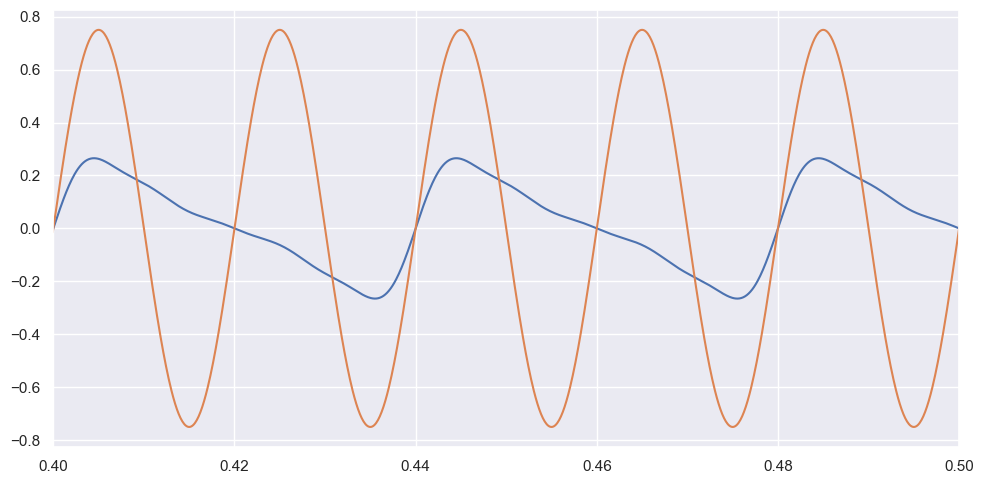

In [27]:
fs = 10000
f0 = 25
n = 8
d = 0.02
p = 0.12
t = np.linspace(0,1,fs)
zz = np.sin(2*np.pi*f0*np.array([1 ,2 ,3 ,4 ,5]).reshape(5,1)*t)/5
print(np.shape(zz))
z = np.matmul(np.array([1,0.5, 0.2, 0.1, 0.05]).reshape(1,5),zz)
z = z[0]
print(np.shape(z))
ss = np.sin(2*np.pi*50*np.array([1 ,2 ,3 ,4 ,5]).reshape(5,1)*t)
ss = (ss[0]*0.75)

sns.set(rc= {"figure.figsize": (10,5)})
fig, ax = plt.subplots()
ax.plot(t,z)
ax.plot(t,ss)
plt.xlim(0.4,0.5)
fig.tight_layout()

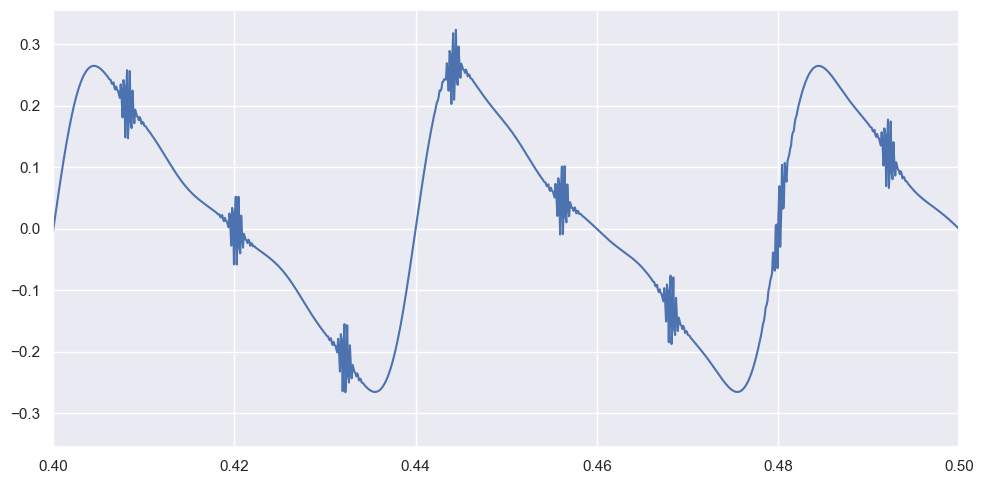

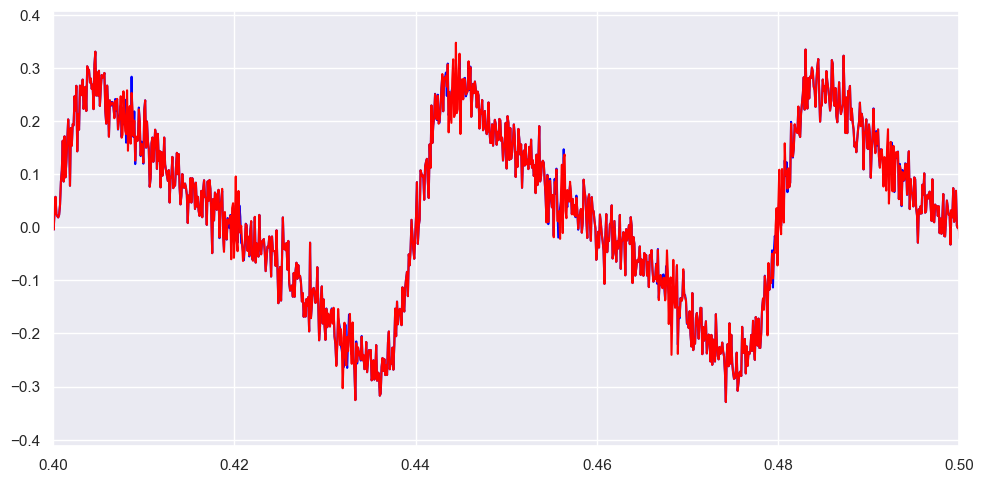

In [28]:
from scipy.signal import windows
from scipy.signal import convolve
ca = 0
bpfo = n*f0/2*(1-d/p*np.cos(ca))
fImpact = 3000
tImpact = np.linspace(0,5*10.0**(-3),50)
window = windows.flattop(len(tImpact))
xImpact = np.sin(2*np.pi*fImpact*tImpact)*window/5
#xImpact = np.array(xImpact).reshape(1,len(xImpact))
XComb = np.zeros((1,len(t)))
XComb = XComb[0]
XComb[1:len(XComb):120]=1
x = convolve(XComb,xImpact,mode="same")/3
x = x+z

fig, ax = plt.subplots()
ax.plot(t,x)
plt.xlim(0.4,0.5)
fig.tight_layout()


sigma = 30
n1 = np.random.normal(0,1,size= len(x))/sigma
n2 = np.random.normal(0,1,size= len(x))/sigma
good = n1+z
bad = n1+x

fig, ax = plt.subplots()
ax.plot(t,good,color="blue")
ax.plot(t,bad, color= "red")
plt.xlim(0.4,0.5)
fig.tight_layout()

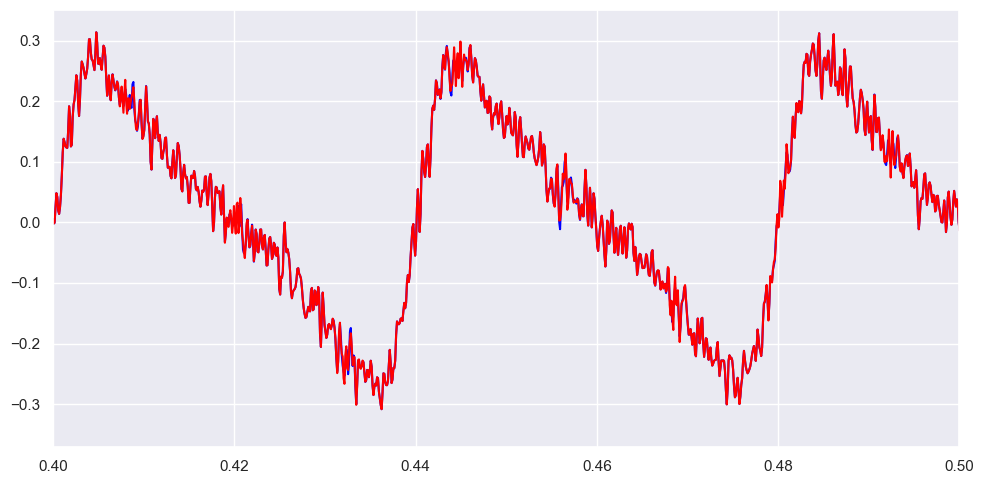

In [29]:
fr = 10000
nfil = 3
sos = signal.butter(nfil,[fr*1/4], btype="low",fs= fr,output="sos")
sfgood = signal.sosfilt(sos,good)
sfbad = signal.sosfilt(sos,bad)

fig, ax = plt.subplots()
ax.plot(t,sfgood,color="blue")
ax.plot(t,sfbad, color= "red")
plt.xlim(0.4,0.5)
fig.tight_layout()

tt = t[4000:5000]
bb = bad[4000:5000]
gg = good[4000:5000]
ss = ss[4000:5000]
nn = np.array([0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3,
               0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3,
               0.4,0.33,0.25,0.2,0.15, -0.4,-0.33,-0.25,-0.2,-0.15,
               0.4,0.33,0.25,0.2,0.15, -0.1,-0.25,-0.4,-0.155,-0.3])
array_true = np.zeros(len(bb))
zeroarr = np.zeros(len(bb))
for i in range(0,len(nn)):
    zeroarr[i*16] = nn[i]
for i in range(0,len(zeroarr)):
    if zeroarr[i] == 0:
        array_true[i] = 0
    else:
        array_true[i]= 1 
b2 = zeroarr+bb
#ss = ss+np.sqrt((zeroarr*0.2)**2)
#print(nn)

array([[<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'broken'}>]], dtype=object)

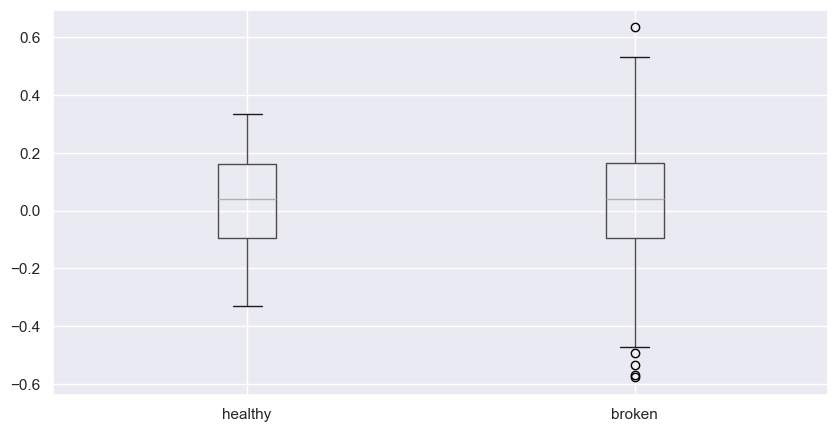

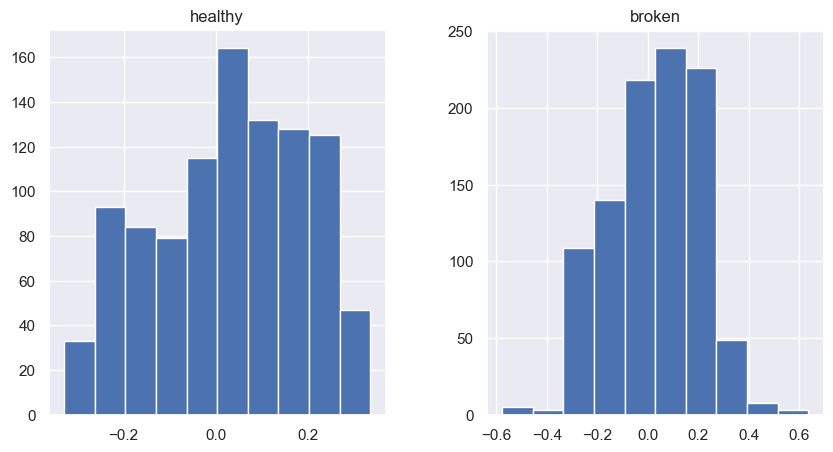

In [30]:
time = pd.to_datetime(tt,unit="s")
#ttime = pd.to_timedelta(tt,unit="milliseconds")
#ttime.to_pytimedelta()
df = pd.DataFrame(index=time, data = {"healthy": gg,"broken":b2})
df.head()
s = validate_series(df)

df.boxplot()
df.hist()


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

def myplot(tt,data, anomalies):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:,0]
    ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    bb = np.empty(0)
    bt = np.empty(0)
    
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            at = np.append(at,tt[i])
        if (ano2[i]==True):
            bb =np.append(bb,dataB[i])
            bt = np.append(bt,tt[i])
    
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="gesund",zorder=1)
    ax2.plot(tt,data["broken"],marker=".",color= "orange",label="beschädigt",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/s^2]")
    ax1.set_xlabel("Zeit in [s]")
    ax2.set_ylabel("Beschleunigung in [m/s^2]")
    ax2.set_xlabel("Zeit in [s]")
    ax1.legend()
    ax2.legend()
    plt.show()

def myplotmulti(tt,data, anomalies):
    print(len(tt),len(data))
    ano1 = anomalies.iloc[0:]
    #ano2 = anomalies.iloc[0:,1]
    dataA = data.iloc[0:,0]
    #dataB = data.iloc[0:,1]
    aa = np.empty(0)
    at = np.empty(0)
    #bb = np.empty(0)
    #bt = np.empty(0)
    
    for i in range(0,len(tt)):
        if (ano1[i]==True):
            aa = np.append(aa,dataA[i])
            at = np.append(at,tt[i])
        #if (ano2[i]==True):
         #   bb =np.append(bb,dataB[i])
          #  bt = np.append(bt,tt[i])
    
    fig, (ax1) = plt.subplots(nrows=1,ncols=1,figure= (10,5))
    ax1.plot(tt,data["healthy"],marker=".",color = "blue",label="Beschädigt",zorder=1)
    ax1.plot(tt,data["broken"],marker=".",color= "orange",label="Strom",zorder=1)
    ax1.scatter(at,aa,marker = "o",color="red",label="Ausreißer",zorder=2)
    #ax2.scatter(bt,bb,marker="o",color="red",label ="Ausreißer",zorder=2)
    ax1.set_ylabel("Beschleunigung in [m/$s^2$]\n Storm in [A]")
    ax1.set_xlabel("Zeit in [s]")
    #ax2.set_ylabel("Beschleunigung in [m/s^2]")
    #ax2.set_xlabel("Zeit in [s]")
    ax1.legend()
    #ax2.legend()
    plt.xlim(0.4,0.5)
    plt.show()

def calcMetric(array_true, array_pred,ss=False):
        tt = np.zeros(len(array_pred))
        for i in range(0,len(array_pred)):
            if array_pred[i]== True:
                tt[i] = True
            else:
                tt[i]= False
        array_pred = tt
        if ss == True:
            print("Accuracy score   = "  ,accuracy_score(array_true, array_pred))
            print("Precision score  = "  ,precision_score(array_true, array_pred))
            print("Recall score     = "  ,recall_score(array_true, array_pred))
            print("F1 score         = "  ,f1_score(array_true, array_pred))
            print("Cohens score     = "  ,cohen_kappa_score(array_true, array_pred))
        return array_pred

c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarni

1000 1000


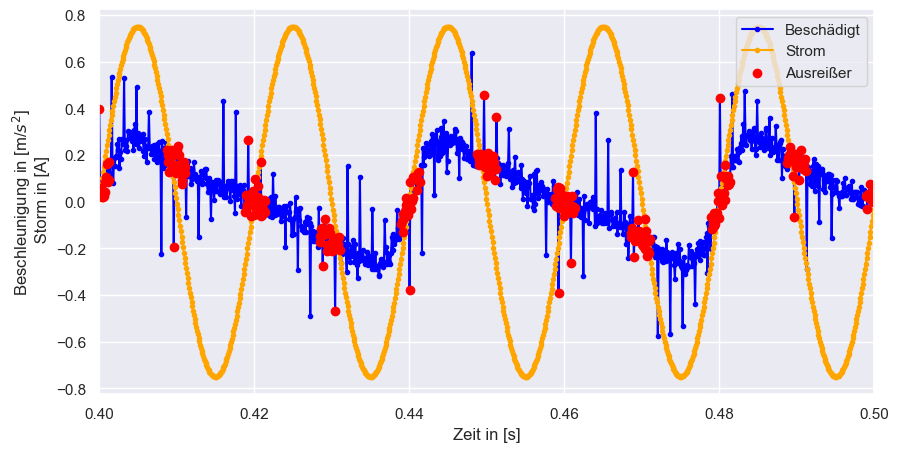

C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
aa = np.random.normal(size=100)
bb = np.random.normal(size= 100)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

t = np.linspace(0.4,0.5,1000)
dd = pd.DataFrame(index=pd.to_datetime(t,unit="ms"),data={"healthy":b2,"broken":ss})


#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')
#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5,     anomaly_color='red', anomaly_tag="marker", curve_group="all")

#t = np.linspace(0,4,256000)
#dd = pd.DataFrame(index=pd.to_datetime(t,unit="ms"),data={"healthy":B2[0:256000],"broken":C2[0:256000]})

curve_tpr = np.zeros(0)
curve_fpr = np.zeros(0)
curve_tresh = np.zeros(0)
anomalies = np.zeros(0)
for i in range(1,20):
    min_cluster_detector = MinClusterDetector(KMeans(n_clusters=i))
    anomalies = min_cluster_detector.fit_detect(dd)
    fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:],False))
    curve_tpr = np.append(curve_tpr,tpr)
    curve_fpr= np.append(curve_fpr,fpr)
    curve_tresh = np.append(curve_tresh,tresh)
zz = list(zip(curve_tpr,curve_fpr))
s_zz = sorted(zz,key = lambda x:x[1])
curve_tpr,curve_fpr = zip(*s_zz)
tpr1 = curve_tpr
fpr1 = curve_fpr
tresh1 = curve_tresh


min_cluster_detector = MinClusterDetector(KMeans(3))
anomalies = min_cluster_detector.fit_detect(dd)
myplotmulti(t,dd,anomalies)
calcMetric(array_true,anomalies.iloc[0:])
#print(anomalies)


c:\Users\Poldy\anaconda3\envs\fresh\Lib\site-packages\adtk\detector\_detector_hd.py:183: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ True False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fal

1000 1000


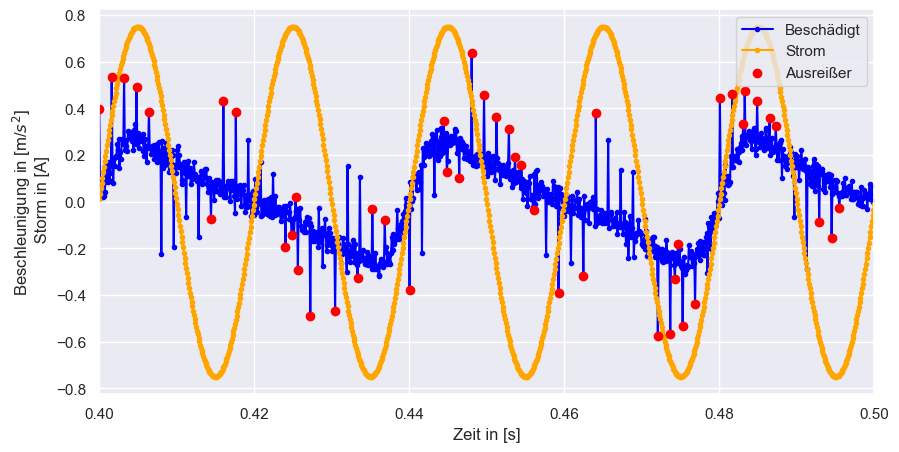

C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor

#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')
#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5,      anomaly_color='red', anomaly_tag="marker", curve_group="all")

curve_tpr = np.zeros(0)
curve_fpr = np.zeros(0)
curve_tresh = np.zeros(0)
anomalies = np.zeros(0)
c_array = np.linspace(0,0.45,10)
for i in range(0,len(c_array)):
    outlier_detector = OutlierDetector(LocalOutlierFactor(contamination="auto"))
    anomalies = outlier_detector.fit_detect(dd)
    fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:],False))
    curve_tpr = np.append(curve_tpr,tpr)
    curve_fpr= np.append(curve_fpr,fpr)
    curve_tresh = np.append(curve_tresh,tresh)
zz = list(zip(curve_tpr,curve_fpr))
s_zz = sorted(zz,key = lambda x:x[1])
curve_tpr,curve_fpr = zip(*s_zz)
tpr2 = curve_tpr
fpr2 = curve_fpr
tresh2 = curve_tresh

outlier_detector = OutlierDetector(LocalOutlierFactor(contamination="auto"))
anomalies = outlier_detector.fit_detect(dd)
myplotmulti(t,dd,anomalies)
calcMetric(array_true,anomalies.iloc[0:])

C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Lo

1000 1000


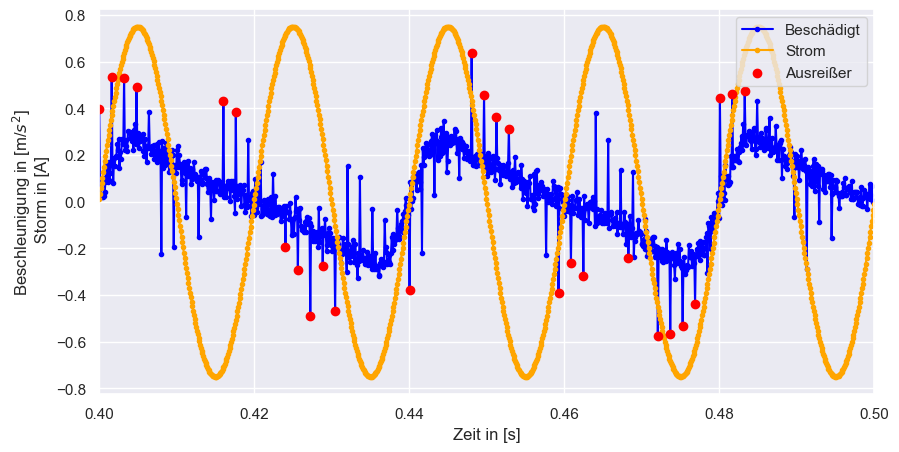

C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression


#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');
#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5,      anomaly_color='red', anomaly_tag="marker", curve_group="all")

curve_tpr = np.zeros(0)
curve_fpr = np.zeros(0)
curve_tresh = np.zeros(0)
anomalies = np.zeros(0)
c_array = np.linspace(0,3,20)
for i in range(0,len(c_array)):
    regression_ad = RegressionAD(regressor=LinearRegression(), target="healthy", c=c_array[i])
    anomalies = regression_ad.fit_detect(dd)
    fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:],False))
    curve_tpr = np.append(curve_tpr,tpr)
    curve_fpr= np.append(curve_fpr,fpr)
    curve_tresh = np.append(curve_tresh,tresh)
zz = list(zip(curve_tpr,curve_fpr))
s_zz = sorted(zz,key = lambda x:x[1])
curve_tpr,curve_fpr = zip(*s_zz)
tpr3 = curve_tpr
fpr3 = curve_fpr
tresh3 = curve_tresh

regression_ad = RegressionAD(regressor=LinearRegression(), target="healthy", c=1.5)
anomalies = regression_ad.fit_detect(dd)
myplotmulti(t,dd,anomalies)
calcMetric(array_true,anomalies.iloc[0:])

C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:
C:\Users\Poldy\AppData\Lo

1000 1000


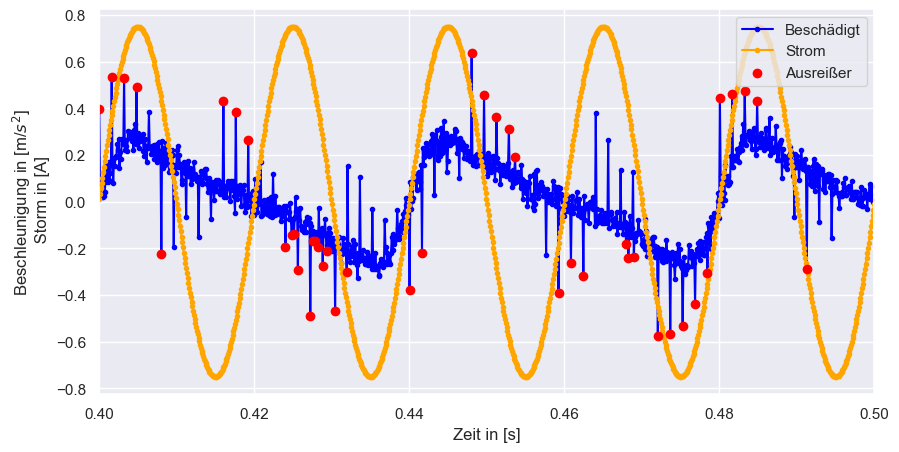

C:\Users\Poldy\AppData\Local\Temp\ipykernel_4632\335175044.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if array_pred[i]== True:


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
from adtk.detector import PcaAD


#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all')
#plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5,anomaly_color='red', anomaly_tag="marker", curve_group="all")

curve_tpr = np.zeros(0)
curve_fpr = np.zeros(0)
curve_tresh = np.zeros(0)
anomalies = np.zeros(0)
c_array = np.linspace(0,3,20)
for i in range(0,len(c_array)):
    pca_ad = PcaAD(c=c_array[i])
    anomalies = pca_ad.fit_detect(dd)
    fpr,tpr,tresh= roc_curve(array_true,calcMetric(array_true,anomalies.iloc[0:],False))
    curve_tpr = np.append(curve_tpr,tpr)
    curve_fpr= np.append(curve_fpr,fpr)
    curve_tresh = np.append(curve_tresh,tresh)
zz = list(zip(curve_tpr,curve_fpr))
s_zz = sorted(zz,key = lambda x:x[1])
curve_tpr,curve_fpr = zip(*s_zz)
tpr4 = curve_tpr
fpr4 = curve_fpr
tresh4 = curve_tresh

pca_ad = PcaAD(c=1.5)
anomalies = pca_ad.fit_detect(dd)

myplotmulti(t,dd,anomalies)
calcMetric(array_true,anomalies.iloc[0:])

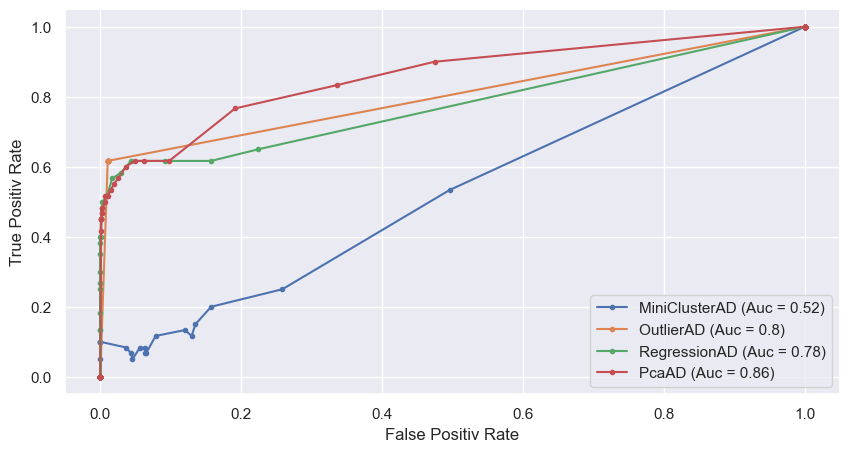

In [43]:
fig, ax = plt.subplots()
ax.plot(fpr1,tpr1,marker=".",label="MiniClusterAD (Auc = "+ str(round(np.trapz(y=tpr1,x=fpr1),2))+")")
ax.plot(fpr2,tpr2,marker=".",label="OutlierAD (Auc = "+ str(round(np.trapz(y=tpr2,x=fpr2),2))+")")
ax.plot(fpr3,tpr3,marker=".",label="RegressionAD (Auc = "+ str(round(np.trapz(y=tpr3,x=fpr3),2))+")")
ax.plot(fpr4,tpr4,marker=".",label="PcaAD (Auc = "+ str(round(np.trapz(y=tpr4,x=fpr4),2))+")")

ax.legend()
ax.set_xlabel("False Positiv Rate")
ax.set_ylabel("True Positiv Rate")
plt.show()